In [44]:

import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import pandas as pd
from shapely.ops import unary_union
import numpy as np
import matplotlib.patches as mpatches
import matplotlib as mpl



In [ ]:
shapefile2 = gpd.read_file("C:/Users/laura/Desktop/Housing/SocialHousing/data/raw/lor_planungsraeume_2021.shp")
shapefile2 = shapefile2.set_geometry('geometry')
shapefile2 = shapefile2[['PLR_ID', 'geometry' ]]

dataframe2 = pd.read_stata("C:/Users/laura/Desktop/Housing/SocialHousing/data/temp/socialhousing_onlytreated.dta")
dataframe3 = pd.read_stata("C:/Users/laura/Desktop/Housing/SocialHousing/data/temp/socialhousing_onlydonors.dta")
dataframe4 = pd.read_stata("C:/Users/laura/Desktop/Housing/SocialHousing/data/temp/socialhousing_multipletreatments.dta")

dataframe5 = pd.read_stata("C:/Users/laura/Desktop/Housing/SocialHousing/data/temp/socialhousing_adj_neighbors.dta")
dataframe6 = pd.read_stata("C:/Users/laura/Desktop/Housing/SocialHousing/data/temp/socialhousing_adjadj_neighbors.dta")

In [11]:
shapefile2 = gpd.read_file("/Users/maxmonert/Library/CloudStorage/Dropbox/Projects/DEU Housing Project/data/raw/lor_planungsraeume_2021.shp/lor_planungsraeume_2021.shp")
shapefile2 = shapefile2.set_geometry('geometry')
shapefile2 = shapefile2[['PLR_ID', 'geometry' ]]

sh_data = pd.read_stata("/Users/maxmonert/Library/CloudStorage/Dropbox/Projects/DEU Housing Project/data/temp/socialhousing_analysis.dta")
# dataframe3 = pd.read_stata("/Users/maxmonert/Library/CloudStorage/Dropbox/Projects/DEU Housing Project/data/temp/socialhousing_onlydonors.dta")
# dataframe4 = pd.read_stata("C:/Users/laura/Desktop/Housing/SocialHousing/data/temp/socialhousing_multipletreatments.dta")

# dataframe5 = pd.read_stata("C:/Users/laura/Desktop/Housing/SocialHousing/data/temp/socialhousing_adj_neighbors.dta")
# dataframe6 = pd.read_stata("C:/Users/laura/Desktop/Housing/SocialHousing/data/temp/socialhousing_adjadj_neighbors.dta")

In [12]:
# Merging the two data frames 
sh_data_merge = pd.merge(shapefile2, sh_data)
#df_multiple = pd.merge(shapefile2, dataframe4)
#df_woadjacent = pd.merge(shapefile2, dataframe5)
#df_woadadjacent = pd.merge(shapefile2, dataframe6)
#len(df_treated)
#len(df_control)
#len(df_multiple)
#len(df_woadjacent)
#len(df_woadadjacent)

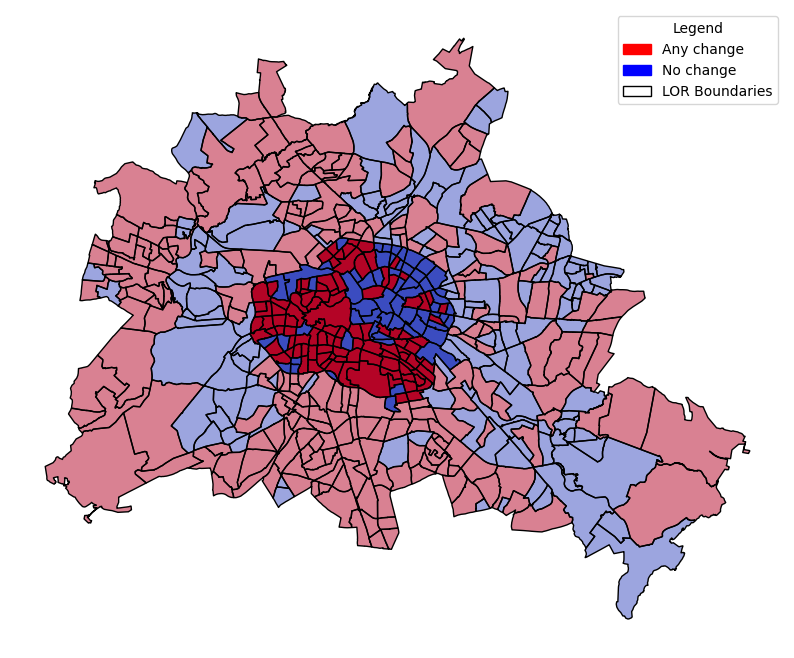

In [60]:
# Create the dummy variable `dd_tot_d_socialh`
sh_data_merge['dd_tot_d_socialh'] = np.where(sh_data_merge['tot_d_socialh'] == 0, 0, 1)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot for a100_r == 1 with full opacity for treated and not treated
sh_data_merge[(sh_data_merge['a100_r'] == 1) & (sh_data_merge['jahr'] == 2019)].plot(column='dd_tot_d_socialh', 
ax=ax, cmap='coolwarm', alpha=1, legend=False)

# Plot for a100_r == 0 with reduced opacity
sh_data_merge[(sh_data_merge['a100_r'] == 0) & (sh_data_merge['jahr'] == 2019)].plot(column='dd_tot_d_socialh', 
ax=ax, cmap='coolwarm', alpha=.5, legend=False)

# Plot the shapefile background with boundaries only
shapefile2.plot(ax=ax, color='none', edgecolor='black')

# Create custom legend patches for clarity
treated_patch = mpatches.Patch(color='red', label='Any change')
not_treated_patch = mpatches.Patch(color='blue', label='No change')
lor_patch = mpatches.Patch(color='black', label='LOR Boundaries', fill=False)

# Set title and remove axis
ax.axis('off')

# Add the custom legend
plt.legend(handles=[treated_patch, not_treated_patch, lor_patch], title="Legend", loc='upper right', fontsize=10)

plt.savefig('/Users/maxmonert/Desktop/Research/Projects/SocialHousing/map_treat.jpeg', format='jpeg', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

/opt/homebrew/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


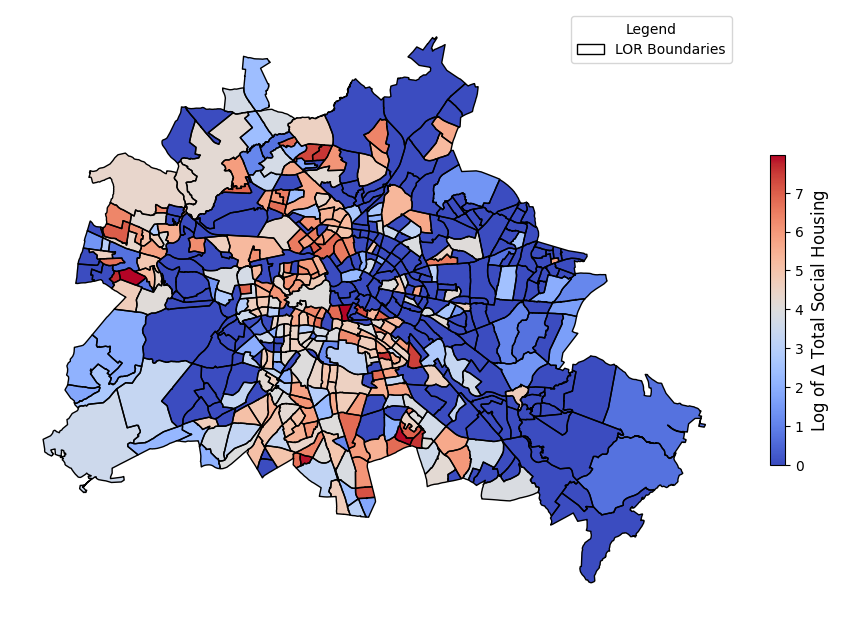

In [58]:
# Create a new column with the log of 'tot_d_socialh', handling zeros by replacing them with NaN
sh_data_merge['log_tot_d_socialh'] = np.where(sh_data_merge['tot_d_socialh'] > 0, 
                                              np.log(sh_data_merge['tot_d_socialh']), 
                                              0)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot for a100_r == 1 with full opacity for treated areas
sh_data_merge[(sh_data_merge['a100_r'] == 1) & (sh_data_merge['jahr'] == 2019)].plot(
    column='log_tot_d_socialh', ax=ax, cmap='coolwarm', alpha=1, legend=False
)

# Plot for a100_r == 0 with reduced opacity
sh_data_merge[(sh_data_merge['a100_r'] == 0) & (sh_data_merge['jahr'] == 2019)].plot(
    column='log_tot_d_socialh', ax=ax, cmap='coolwarm', alpha=1, legend=False
)
# Plot the shapefile background with boundaries only
shapefile2.plot(ax=ax, color='none', edgecolor='black')

# Create a ScalarMappable for the color bar
norm = mpl.colors.Normalize(vmin=sh_data_merge['log_tot_d_socialh'].min(), 
                            vmax=sh_data_merge['log_tot_d_socialh'].max())
cmap = mpl.cm.coolwarm
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add the continuous color bar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.02, pad=0.04)
cbar.set_label(r'Log of $\Delta$ Total Social Housing', fontsize=12)

# Custom legend for LOR boundaries
lor_patch = mpatches.Patch(color='black', label='LOR Boundaries', fill=False)
plt.legend(handles=[lor_patch], title="Legend", loc='upper right', fontsize=10)

# Set title and remove axis
# ax.set_title("Log of Total Social Housing by Treatment Status", fontsize=16)
ax.axis('off')

plt.savefig('/Users/maxmonert/Desktop/Research/Projects/SocialHousing/map_treat_cont.jpeg', format='jpeg', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
, 
ax=ax, cmap='coolwarm', alpha=0.5, legend=False)

# Plot the shapefile background with boundaries only
shapefile2.plot(ax=ax, color='none', edgecolor='black')

# Create custom legend patches for clarity
#treated_patch = mpatches.Patch(color='red', label='Treated')
#not_treated_patch = mpatches.Patch(color='blue', label='Not Treated')
#lor_patch = mpatches.Patch(color='black', label='LOR Boundaries', fill=False)

# Add the custom legend
plt.legend(handles=[treated_patch, not_treated_patch, lor_patch], title="Categories", loc='upper right', fontsize=10)

# Display the plot
plt.show()

In [ ]:

# Plot the shapefile background with boundaries only
shapefile2.plot(ax=ax, color='none', edgecolor='black')

# Create custom legend patches for clarity
#treated_patch = mpatches.Patch(color='red', label='Treated')
#not_treated_patch = mpatches.Patch(color='blue', label='Not Treated')
#lor_patch = mpatches.Patch(color='black', label='LOR Boundaries', fill=False)

# Add the custom legend
plt.legend(handles=[treated_patch, not_treated_patch, lor_patch], title="Categories", loc='upper right', fontsize=10)

# Display the plot
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
shapefile2.plot(ax=ax, color='white', edgecolor='black')
df_treated.plot(ax=ax, color='green', edgecolor='black')
df_multiple.plot(ax=ax, color='lightgreen', edgecolor='black')
df_woadjacent.plot(ax=ax, color='red', edgecolor='black')
plt.show()
plt.savefig('C:/Users/laura/Desktop/SocialHousing/output/graphs/map_treated_control2.png')

In [ ]:
# Dataframe without adadjacent 
fig, ax = plt.subplots(figsize=(10, 10))
shapefile2.plot(ax=ax, color='white', edgecolor='black')
df_treated.plot(ax=ax, color='green', edgecolor='black')
df_multiple.plot(ax=ax, color='lightgreen', edgecolor='black')
df_woadadjacent.plot(ax=ax, color='red', edgecolor='black')
plt.show()

In [ ]:
# Picturing the Planungsräume which are now excluded 
fig, ax = plt.subplots(figsize=(10, 10))
df_control.plot(ax=ax, color='red', edgecolor='black')
df_woadjacent.plot(ax=ax, color='blue', edgecolor='black')
df_woadadjacent.plot(ax=ax, color='lightblue', edgecolor='black')
plt.show()